# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [32]:
bvsales = pd.read_csv("/content/sample_data/Dataset_inisiasi.csv")
bvsales

,Category,Cluster,Product,Unit_Price,Quantity,Discount,Total_Price
0,Juices,4,Hohes C Orange,1.87,74,0.10,124.54
1,Soft Drinks,2,Fritz-Kola,1.87,18,0.05,31.98
2,Juices,4,Granini Apple,1.64,4,0.00,6.56
3,Alcoholic Beverages,1,Riesling,8.62,47,0.05,384.88
4,Soft Drinks,2,Pepsi,1.74,5,0.00,8.70
...,...,...,...,...,...,...,...
1922,Juices,4,Passion Fruit Juice,2.31,4,0.05,8.78
1923,Water,3,Evian,1.26,12,0.00,15.12
1924,Water,3,Vio Wasser,1.71,11,0.00,18.81
1925,Juices,4,Granini Apple,1.46,14,0.05,19.42


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
bvsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927 entries, 0 to 1926
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category     1927 non-null   object 
 1   Cluster      1927 non-null   int64  
 2   Product      1927 non-null   object 
 3   Unit_Price   1927 non-null   float64
 4   Quantity     1927 non-null   int64  
 5   Discount     1927 non-null   float64
 6   Total_Price  1927 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 105.5+ KB


In [35]:
bvsales.rename(columns={"Cluster": "Label"}, inplace=True)

In [36]:
bvsales.describe()

,Label,Unit_Price,Quantity,Discount,Total_Price
count,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000
mean,2.585366,1.924136,23.895693,0.030643,43.039061
std,1.053528,1.403907,26.490031,0.039519,61.712854
min,1.000000,0.330000,1.000000,0.000000,0.550000
25%,2.000000,1.010000,6.000000,0.000000,7.640000
50%,3.000000,1.590000,12.000000,0.000000,19.040000
75%,3.000000,2.380000,35.000000,0.050000,53.065000
max,4.000000,10.860000,100.000000,0.100000,635.310000


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [37]:
# data numerik dinormalisasikan terlebih dahulu agar berada dalam rentang sama

scaler = MinMaxScaler()

numeric_columns = ["Unit_Price", "Quantity", "Discount", "Total_Price"]
bvsales[numeric_columns] = scaler.fit_transform(bvsales[numeric_columns])

In [38]:
# data kategorik di-encoding terlebih dahulu agar menjadi numerik

encoder = LabelEncoder()
bvsales["Category"] = encoder.fit_transform(bvsales["Category"]) + 1  # Mulai dari 1
bvsales["Product"] = encoder.fit_transform(bvsales["Product"]) + 1

In [39]:
bvsales.head()

,Category,Label,Product,Unit_Price,Quantity,Discount,Total_Price
0,2,4,14,0.146249,0.737374,1.0,0.195334
1,3,2,11,0.146249,0.171717,0.5,0.049515
2,2,4,13,0.124406,0.030303,0.0,0.009468
3,1,1,27,0.787274,0.464646,0.5,0.605473
4,3,2,24,0.133903,0.040404,0.0,0.012839


In [40]:
# Pisahkan fitur (X) dan target (y)
X = bvsales.drop(columns=["Label"])  # 'Label' adalah target
y = bvsales["Label"]

# Split data menjadi set pelatihan dan set uji (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(1541, 6), y_train=(1541,)
Test set shape: X_test=(386, 6), y_test=(386,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

- **KNN**: Klasifikasi berdasarkan mayoritas *k* tetangga terdekat.  
- **Decision Tree (DT)**: Pemisahan data berbasis aturan dalam struktur pohon.  
- **Random Forest (RF)**: Ensemble pohon keputusan untuk meningkatkan akurasi.  
- **SVM**: Mencari hyperplane terbaik untuk memisahkan kelas.  
- **Naive Bayes (NB)**: Klasifikasi berbasis Teorema Bayes dengan asumsi fitur independen.  
- **Logistic Regression (LR)**: Model probabilistik berbasis fungsi sigmoid untuk klasifikasi.  


In [41]:
# Latih data train
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
log_reg = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

In [42]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    results = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1-Score": f1_score(y_test, y_pred, average="weighted")
    }
    return results

results = {
    "K-Nearest Neighbors (KNN)": evaluate_model(knn, X_test, y_test),
    "Decision Tree (DT)": evaluate_model(dt, X_test, y_test),
    "Random Forest (RF)": evaluate_model(rf, X_test, y_test),
    "Support Vector Machine (SVM)": evaluate_model(svm, X_test, y_test),
    "Logistic Regression (LR)": evaluate_model(log_reg, X_test, y_test),
}

summary_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

rows = []
for model_name, metrics in results.items():
    rows.append({
        "Model": model_name,
        "Accuracy": metrics["Accuracy"],
        "Precision": metrics["Precision"],
        "Recall": metrics["Recall"],
        "F1-Score": metrics["F1-Score"]
    })

summary_df = pd.DataFrame(rows)
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  1.000000   1.000000  1.000000  1.000000
1            Decision Tree (DT)  1.000000   1.000000  1.000000  1.000000
2            Random Forest (RF)  1.000000   1.000000  1.000000  1.000000
3  Support Vector Machine (SVM)  0.800518   0.831388  0.800518  0.789898
4      Logistic Regression (LR)  1.000000   1.000000  1.000000  1.000000


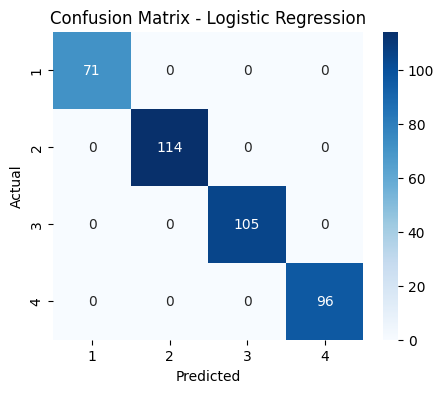

Logistic Regression - Accuracy: 1.0000, F1-Score: 1.0000



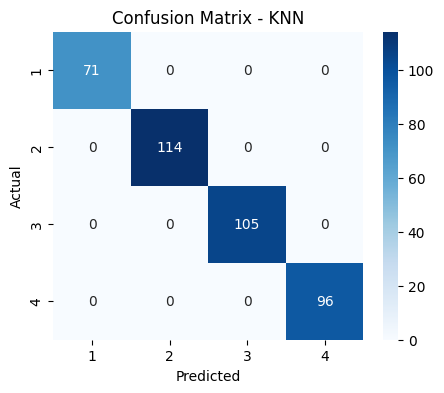

KNN - Accuracy: 1.0000, F1-Score: 1.0000



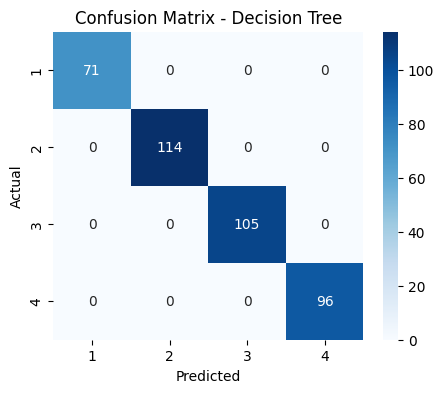

Decision Tree - Accuracy: 1.0000, F1-Score: 1.0000



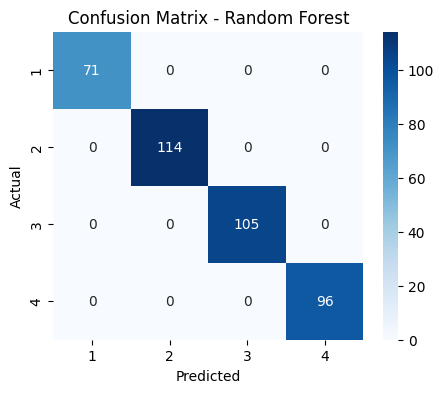

Random Forest - Accuracy: 1.0000, F1-Score: 1.0000



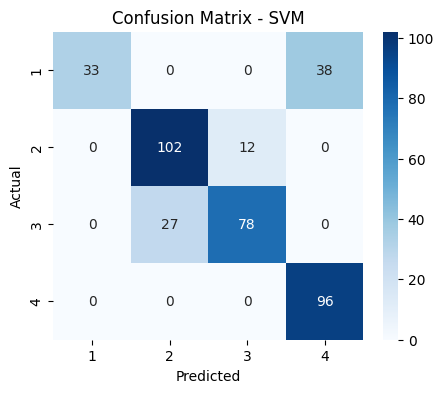

SVM - Accuracy: 0.8005, F1-Score: 0.7899



In [43]:
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"{model_name} - Accuracy: {acc:.4f}, F1-Score: {f1:.4f}\n")

plot_confusion_matrix(log_reg, X_test, y_test, "Logistic Regression")
plot_confusion_matrix(knn, X_test, y_test, "KNN")
plot_confusion_matrix(dt, X_test, y_test, "Decision Tree")
plot_confusion_matrix(rf, X_test, y_test, "Random Forest")
plot_confusion_matrix(svm, X_test, y_test, "SVM")

## **c. Tuning Model Klasifikasi (Optional)**

Digunakan RandomizedSearchCV untuk hyperparameter tuning karena lebih cepat dan efisien untuk dataset besar.

In [44]:
# Dictionary untuk menyimpan model yang telah dituning
tuned_models = {}

In [45]:
# 1. Hyperparameter Tuning untuk K-Nearest Neighbors (KNN)
param_dist_knn = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

random_knn = RandomizedSearchCV(KNeighborsClassifier(), param_dist_knn, cv=5, scoring="accuracy", n_iter=10, n_jobs=-1, random_state=42)
random_knn.fit(X_train, y_train)
tuned_models["KNN"] = random_knn.best_estimator_

print(f"KNN Best Params: {random_knn.best_params_}")

KNN Best Params: {'weights': 'uniform', 'n_neighbors': 3, 'metric': 'euclidean'}


In [46]:
# 2. Hyperparameter Tuning untuk Decision Tree (DT)
param_dist_dt = {
    "max_depth": [None, 10, 20, 30, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

random_dt = RandomizedSearchCV(DecisionTreeClassifier(), param_dist_dt, cv=5, scoring="accuracy", n_iter=10, n_jobs=-1, random_state=42)
random_dt.fit(X_train, y_train)
tuned_models["Decision Tree"] = random_dt.best_estimator_

print(f"Decision Tree Best Params: {random_dt.best_params_}")

Decision Tree Best Params: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 40}


In [ ]:
# 3. Hyperparameter Tuning untuk Random Forest (RF)
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

random_rf = RandomizedSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring="accuracy", n_iter=10, n_jobs=-1, random_state=42)
random_rf.fit(X_train, y_train)
tuned_models["Random Forest"] = random_rf.best_estimator_

print(f"Random Forest Best Params: {random_rf.best_params_}")

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# 4. Hyperparameter Tuning untuk SVM (Optimized)
param_dist_svm = {
    "C": [0.1, 1, 10],  # Mengurangi jumlah nilai C
    "kernel": ["linear", "rbf"],  # Menghapus "poly" untuk efisiensi
    "gamma": ["scale"]  # Menggunakan hanya "scale" untuk konsistensi
}

random_svm = RandomizedSearchCV(
    SVC(),
    param_distributions=param_dist_svm,
    cv=3,  # Mengurangi jumlah fold untuk percepatan
    scoring="accuracy",
    n_iter=5,  # Mengurangi iterasi
    n_jobs=-1,
    random_state=42
)

random_svm.fit(X_train, y_train)
tuned_models["SVM"] = random_svm.best_estimator_

print(f"SVM Best Params: {random_svm.best_params_}")


In [ ]:
# 5. Hyperparameter Tuning untuk Logistic Regression (LR)
param_dist_lr = {
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["liblinear", "lbfgs"]
}

random_lr = RandomizedSearchCV(LogisticRegression(max_iter=1000), param_dist_lr, cv=5, scoring="accuracy", n_iter=10, n_jobs=-1, random_state=42)
random_lr.fit(X_train, y_train)
tuned_models["Logistic Regression"] = random_lr.best_estimator_

print(f"Logistic Regression Best Params: {random_lr.best_params_}")

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
tuned_results = {}

for model_name, model in tuned_models.items():
    tuned_results[model_name] = evaluate_model(model, X_test, y_test)

tuned_summary_df = pd.DataFrame.from_dict(tuned_results, orient="index")
print("\nEvaluasi Model Setelah Hyperparameter Tuning:")
print(tuned_summary_df)

In [ ]:
# Plot confusion matrix untuk setiap model yang telah dituning
for model_name, model in tuned_models.items():
    plot_confusion_matrix(model, X_test, y_test, model_name)

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

#### **1. Perbandingan Sebelum dan Setelah Hyperparameter Tuning**  
- Sebelum tuning, SVM memiliki performa yang lebih rendah dibanding model lain, dengan akurasi 80% dan F1-score 78.9%  
- Setelah tuning, semua model, termasuk SVM, mencapai akurasi, precision, recall, dan F1-score sebesar 1.0, menunjukkan peningkatan yang signifikan.  

#### **2. Identifikasi Kelemahan Model**  
- Tidak ada perbedaan antara precision dan recall di semua model setelah tuning, menandakan model tidak mengalami bias terhadap kelas tertentu.  
- Namun, hasil evaluasi yang sempurna (1.0 di semua metrik) bisa menjadi indikasi overfitting, terutama jika dataset tidak cukup kompleks atau memiliki pola yang terlalu mudah dipelajari.  

#### **3. Rekomendasi Tindakan Lanjutan**  
- Validasi lebih lanjut menggunakan cross-validation atau data uji baru untuk memastikan model tetap bekerja dengan baik pada data yang belum pernah dilihat.  
- Cek distribusi data untuk memastikan tidak ada ketidakseimbangan kelas yang menyebabkan model terlalu mudah mempelajari pola tertentu.   


#### Cross-validation dan Cek Distribusi Data

In [ ]:
# Daftar model setelah tuning
models = {
    "Logistic Regression": tuned_models["Logistic Regression"],
    "KNN": tuned_models["KNN"],
    "Decision Tree": tuned_models["Decision Tree"],
    "Random Forest": tuned_models["Random Forest"],
    "SVM": tuned_models["SVM"]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1)
    cv_results[name] = {
        "Mean Accuracy": np.mean(scores),
        "Std Dev": np.std(scores)
    }
    print(f"{name} - Mean Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

cv_df = pd.DataFrame(cv_results).T
print("\nCross-Validation Results:")
print(cv_df)


In [ ]:
# Cek distribusi fitur numerik dalam X_train
plt.figure(figsize=(10, 6))
X_train.hist(bins=20, figsize=(10, 6), layout=(2, 3), edgecolor="black")
plt.suptitle("Distribusi Fitur Numerik pada Data Training")
plt.show()

print("Ringkasan Statistik X_train:")
print(X_train.describe())

In [ ]:
# Cek proporsi setiap kelas
y_train.value_counts(normalize=True) * 100

Keterangan: Proporsi data pada y_train sudah memadai (lebih dari 20% untuk setiap kategori). Sementara itu, pada x_train terdapat beberapa fitur seperti Quantity, Discount, dan Total_Price yang memiliki nilai tertentu, sehingga perlu dilakukan pemeriksaan lebih lanjut.